In [1]:
#Factor analysis is to understand the influences of latent variables(unobserved), you cant directly measure
#these latent variables are believed to be driving observed variables
#Two types of FA: Exploratory and Confirmatory
#Exploratory: there is no precise relationship b/w observed and latent variables
#Confirmatory: it is established^
#Two ways to fit the model: bayesian or by frequency based 

#In this below analysis:
#Exploratory factor analysis is done using frequencies method
#psychometrics: a person's personality, intelligence etc.



In [ ]:
! pip install factor_analyzer

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
df=pd.read_csv('C:/Users/sanyalam/Downloads/bfi.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [5]:
#dropping unnecessary columns
df.drop(['gender','education','age'],axis=1,inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
#Sampling adequacy dataset
#check points for factor analysis
#bartlett's test of sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.199553924966, 0.0)

In [8]:
#KMO Test <0.6 inadequate
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [9]:
kmo_model

0.8482210116350438

In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
print(df.shape)

(2436, 25)


In [12]:
fa=FactorAnalyzer(n_factors=6,rotation='varimax')

In [13]:
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [14]:
#get the loadings
loadings=fa.loadings_

In [15]:
#eigenfactor and eigenvalues
ev,v=fa.get_eigenvalues()

In [16]:
#scree plot
xvals=range(1,df.shape[1]+1)

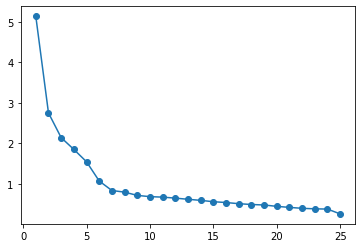

In [17]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)

In [24]:
import pandas as pd
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
1,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
2,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
3,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
4,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
5,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
6,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
7,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
8,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
9,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [27]:
#scaling is done to make sure than columns with greater SD dont have much influence in the model
from sklearn import preprocessing
scale_df=preprocessing.scale(X=df)
scale_df=pd.DataFrame(data=scale_df)
scale_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,-0.350905,-0.273636,-0.156754,-0.192698,0.014698,0.012918,-0.020587,0.115074,0.038293,...,0.168279,0.139814,0.092366,0.042140,0.015181,0.005782,0.066176,-0.063788,-0.090512,0.099166
1,-0.350905,1.000000,0.503041,0.350856,0.397400,0.102983,0.129574,0.188818,-0.146295,-0.121106,...,-0.093627,-0.050476,-0.040407,-0.086735,0.019688,0.125633,0.013958,0.165319,0.082609,-0.080838
2,-0.273636,0.503041,1.000000,0.384918,0.515679,0.114211,0.146511,0.129391,-0.121116,-0.153811,...,-0.083266,-0.092473,-0.039158,-0.127107,-0.040143,0.150086,0.006588,0.226333,0.032267,-0.041750
3,-0.156754,0.350856,0.384918,1.000000,0.325644,0.094813,0.226454,0.133065,-0.172271,-0.249675,...,-0.106645,-0.155289,-0.073887,-0.171228,-0.015136,0.057075,0.037763,0.070983,-0.049793,0.027308
4,-0.192698,0.397400,0.515679,0.325644,1.000000,0.134692,0.116863,0.130820,-0.125531,-0.167036,...,-0.204765,-0.198836,-0.138472,-0.215346,-0.081404,0.162596,-0.006988,0.238191,0.011354,-0.050449
5,0.014698,0.102983,0.114211,0.094813,0.134692,1.000000,0.438223,0.317270,-0.362491,-0.261079,...,-0.071954,-0.038180,-0.025476,-0.098035,-0.047970,0.179249,-0.129263,0.196562,0.100189,-0.130471
6,0.012918,0.129574,0.146511,0.226454,0.116863,0.438223,1.000000,0.362826,-0.396090,-0.303820,...,-0.019951,-0.005586,0.003189,-0.044341,0.051212,0.161042,-0.057347,0.192681,0.047427,-0.066590
7,-0.020587,0.188818,0.129391,0.133065,0.130820,0.317270,0.362826,1.000000,-0.357824,-0.350949,...,-0.079093,-0.066880,-0.077416,-0.122175,-0.023508,0.091141,-0.029604,0.058880,0.011360,-0.002809
8,0.115074,-0.146295,-0.121116,-0.172271,-0.125531,-0.362491,-0.396090,-0.357824,1.000000,0.487551,...,0.215852,0.158346,0.201905,0.270633,0.197062,-0.093561,0.208072,-0.083027,0.053014,0.189543
9,0.038293,-0.121106,-0.153811,-0.249675,-0.167036,-0.261079,-0.303820,-0.350949,0.487551,1.000000,...,0.216414,0.246298,0.241599,0.354664,0.179009,-0.085630,0.122596,-0.074129,0.135482,0.055804


<AxesSubplot:>

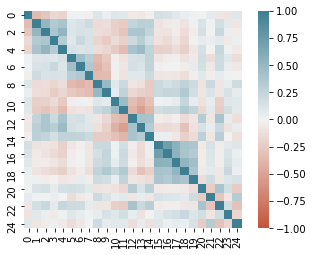

In [32]:
#0-2,4-8,14-18 are highly correlated
#there maybe 3 factors indluencing the dataset
import seaborn as sns
sns.heatmap(data=scale_df.corr(),vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=400),square=True)

In [34]:
fa=FactorAnalyzer(n_factors=3,rotation='varimax')

In [35]:
#by default use squared multiple correlation as guess factors
#fit the model using minres,ml or principal solns.
fa.fit(X=scale_df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [36]:
#in this below array, the number of rows signify the dataframe 'columns': '25' columns in df =rows here and 3 factors are the columns
fa.loadings_

array([[-0.22789735,  0.09816722, -0.00625463],
       [ 0.53712338,  0.01571729,  0.12191675],
       [ 0.63507242, -0.00683719,  0.09288058],
       [ 0.40527973, -0.09554982,  0.13367823],
       [ 0.64374308, -0.13308329,  0.08258307],
       [ 0.09656738,  0.02826984,  0.590628  ],
       [ 0.10249235,  0.08829708,  0.61169364],
       [ 0.08657802, -0.04371513,  0.47633628],
       [-0.07648459,  0.23693057, -0.62244116],
       [-0.15741508,  0.30474041, -0.47926358],
       [-0.51137321,  0.05833407,  0.00977152],
       [-0.58365992,  0.26066883, -0.11064398],
       [ 0.60987834,  0.03525192,  0.17796802],
       [ 0.68121593, -0.15325722,  0.04089417],
       [ 0.46985494,  0.03504421,  0.35897863],
       [-0.06462779,  0.74275461, -0.10627836],
       [-0.08173552,  0.73947034, -0.05730228],
       [-0.04546595,  0.74216506, -0.09087265],
       [-0.24397609,  0.60691661, -0.14598886],
       [-0.06773953,  0.51319527, -0.12607653],
       [ 0.25244327,  0.04521824,  0.307

In [37]:
fa.corr_

array([[ 1.00000000e+00, -3.50905455e-01, -2.73636113e-01,
        -1.56753579e-01, -1.92697601e-01,  1.46977349e-02,
         1.29183757e-02, -2.05867160e-02,  1.15073752e-01,
         3.82929681e-02,  1.07178488e-01,  8.79220360e-02,
        -4.89133537e-02, -6.97809644e-02, -2.01824341e-02,
         1.68279347e-01,  1.39813502e-01,  9.23657497e-02,
         4.21401544e-02,  1.51807429e-02,  5.78196542e-03,
         6.61762149e-02, -6.37877910e-02, -9.05116369e-02,
         9.91655118e-02],
       [-3.50905455e-01,  1.00000000e+00,  5.03041094e-01,
         3.50856207e-01,  3.97400236e-01,  1.02983100e-01,
         1.29573630e-01,  1.88817947e-01, -1.46294976e-01,
        -1.21106136e-01, -2.22280083e-01, -2.43083575e-01,
         2.55066139e-01,  2.97125399e-01,  2.94191329e-01,
        -9.36272214e-02, -5.04755594e-02, -4.04074548e-02,
        -8.67351942e-02,  1.96881421e-02,  1.25633375e-01,
         1.39583408e-02,  1.65318693e-01,  8.26090856e-02,
        -8.08381937e-02],
    

In [38]:
#if a rotation has been formed, rotation matrix
fa.rotation_matrix_

array([[ 0.74618156,  0.45335278, -0.4875288 ],
       [-0.45554404,  0.88171913,  0.12268252],
       [ 0.48548193,  0.13054741,  0.86444472]])

In [39]:
fa.get_communalities()

array([0.06161313, 0.30361225, 0.41199053, 0.1912513 , 0.43893628,
       0.35896588, 0.39247017, 0.23630302, 0.44941899, 0.3473398 ,
       0.26500091, 0.42084923, 0.40486691, 0.48921526, 0.35085742,
       0.56715625, 0.55678063, 0.56113397, 0.44918485, 0.28385332,
       0.16005306, 0.09668741, 0.23069533, 0.08193128, 0.0805651 ])

In [40]:
fa.get_eigenvalues()

(array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
        1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
        0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
        0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
        0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902]),
 array([ 4.51764039,  2.19685737,  1.47623622,  1.0697201 ,  0.84281782,
         0.3596285 ,  0.16657383,  0.10732501,  0.03430336,  0.00623243,
        -0.01283831, -0.06491411, -0.08919978, -0.10285428, -0.11289038,
        -0.12672066, -0.17299747, -0.17723581, -0.19199618, -0.20814859,
        -0.23042509, -0.24840857, -0.26740588, -0.27576198, -0.30480564]))

In [42]:
fa.get_uniquenesses()

array([0.93838687, 0.69638775, 0.58800947, 0.8087487 , 0.56106372,
       0.64103412, 0.60752983, 0.76369698, 0.55058101, 0.6526602 ,
       0.73499909, 0.57915077, 0.59513309, 0.51078474, 0.64914258,
       0.43284375, 0.44321937, 0.43886603, 0.55081515, 0.71614668,
       0.83994694, 0.90331259, 0.76930467, 0.91806872, 0.9194349 ])

In [43]:
fa.transform(X=scale_df)

array([[-0.49544611, -0.61407702, -1.69872538],
       [ 0.3009938 ,  0.0716807 , -0.56427543],
       [-0.16860362,  0.51731438,  0.10225342],
       ...,
       [ 0.02811066, -0.10524811,  1.15882002],
       [-0.56289499,  1.01088778,  0.37868886],
       [-2.21389985, -1.54677776,  0.02849906]])